In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
df=pd.read_csv(r'D:\AnacondaProjects\hack7\training.csv', encoding= 'unicode_escape')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)
df=df[0:100]
df=df.drop('PLAYER',axis=1)
df_testmodel=df[5:15]
df=df.drop(df.index[5:15])

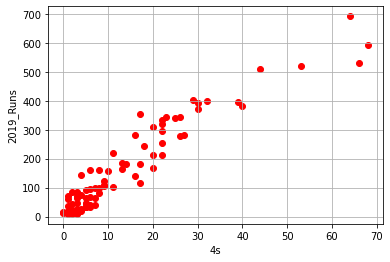

In [2]:
title='4s'
plt.scatter(df[title], df['2019_Runs'], color='red')
plt.xlabel(title)
plt.ylabel('2019_Runs')
plt.grid(True)
plt.show()

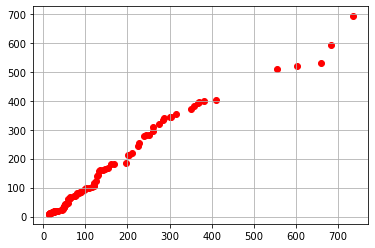

In [3]:
plt.scatter(df['2018_Runs'], df['2019_Runs'], color='red')
plt.grid(True)
plt.show()

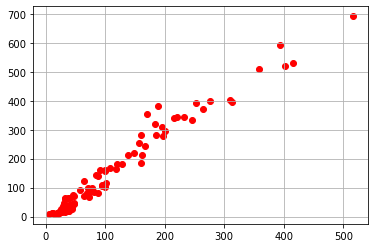

In [4]:
plt.scatter(df['BF'], df['2019_Runs'], color='red')
plt.grid(True)
plt.show()

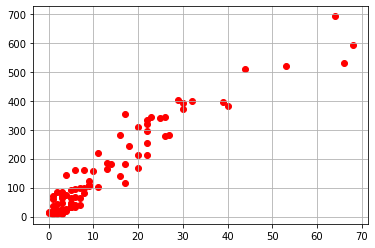

In [5]:
plt.scatter(df['4s'], df['2019_Runs'], color='red') 
plt.grid(True)
plt.show()

In [6]:
dfe=pd.read_csv(r'D:\AnacondaProjects\hack7\testing.csv', encoding= 'unicode_escape')
dfe.replace([np.inf, -np.inf], np.nan, inplace=True)
dfe.fillna(0, inplace=True)

X = df[['2018_Runs','BF','4s']]
Y = df['2019_Runs']
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [7]:
model_pred=regr.predict(df_testmodel[['2018_Runs','BF','4s']])-40

print(model_pred)
print(df_testmodel['2019_Runs'])
r2_score(df_testmodel['2019_Runs'], model_pred)

[482.0732091  483.49669891 459.45091112 440.38706538 439.85043221
 446.87095421 407.67466682 423.71023831 414.67039746 404.41596522]
5     490.0
6     488.0
7     464.0
8     463.0
9     445.0
10    442.0
11    424.0
12    416.0
13    405.0
14    405.0
Name: 2019_Runs, dtype: float64


0.8800014416812713

In [8]:
dfe['2020_Runs']=regr.predict(dfe[['2019_Runs','BF','4s']])-40
dfe['2020_Runs']=dfe['2020_Runs'].clip(lower=0)
dfe

,PLAYER,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s,2020_Runs
0,David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21,650.496765
1,KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25,564.753596
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,501.264783
3,Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11,462.088513
4,Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52,427.116927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Carlos Brathwaite,2,2,0,11,6,5.5,10,110.00,0,0,1,0,0.000000
96,Ishant Sharma,13,3,3,10,10*,-,3,333.33,0,0,1,1,0.000000
97,Shakib Al Hasan,3,1,0,9,9,9,10,90.00,0,0,0,0,0.000000
98,Pawan Negi,7,4,0,9,5,2.25,12,75.00,0,0,1,0,0.000000


In [9]:
saver = dfe[['PLAYER', '2020_Runs']]
dfe.to_csv('D:/AnacondaProjects/hack7/ritu_Flip7.csv', columns = saver)

In [10]:
useful_columns = ['PLAYER', '2020_Runs']
dfe.loc[:,useful_columns].to_excel('D:/AnacondaProjects/hack7/ritu_Flip7_1.xlsx',index=False)

In [11]:
print(regr.coef_)
print(regr.intercept_)

[ 0.74553157  0.53010922 -1.35739413]
-3.02215188573507
